# Plot SatScan Results

Import libraries

In [1]:
import sys
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geoplot
import mapclassify
sys.path.append(os.path.abspath('..'))
%matplotlib inline

Read files

In [2]:
root = '../'
gd = gpd.read_file(root + "Maps/BRMUE250GC_SIR.shp")
gdf = gpd.read_file('Clusters/result.col.shp')

Filter gdf to remove clusters with p-value < 0.05

In [3]:
gdf = gdf[gdf['P_VALUE'] < 0.05]

In [4]:
gdf

,CLUSTER,LOC_ID,LATITUDE,LONGITUDE,RADIUS,START_DATE,END_DATE,NUMBER_LOC,LLR,P_VALUE,OBSERVED,EXPECTED,ODE,REL_RISK,POPULATION,GINI_CLUST,geometry
0,1.0,430187,-30.20,-57.55,914.715250,2008/1/1,2018/12/31,1007.0,3985.862456,1.000000e-17,21569.0,11506.738245,1.874467,2.072061,19563340.73,F,"POLYGON ((-57.55000 -21.96860, -57.39563 -21.9..."
1,2.0,430995,-28.62,-52.51,392.014086,2008/1/1,2018/12/31,823.0,3599.124201,1.000000e-17,18081.0,9308.789325,1.942358,2.114566,15826467.37,T,"POLYGON ((-52.51000 -25.09232, -52.44206 -25.0..."
2,3.0,290690,-17.73,-39.26,1030.640170,2008/1/1,2018/12/31,1918.0,1702.410417,1.000000e-17,48097.0,58048.455072,0.828566,0.708941,98691886.53,F,"POLYGON ((-39.26000 -8.45541, -39.09707 -8.456..."
3,4.0,330330,-22.88,-43.10,125.467930,2008/1/1,2018/12/31,70.0,1205.489204,1.000000e-17,4730.0,8792.817375,0.537939,0.518476,14949230.49,T,"POLYGON ((-43.10000 -21.75093, -43.07879 -21.7..."
4,5.0,291490,-14.27,-38.99,397.051962,2008/1/1,2018/12/31,353.0,860.624862,1.000000e-17,4088.0,7240.781165,0.564580,0.548819,12310514.59,T,"POLYGON ((-38.99000 -10.69698, -38.92658 -10.6..."
5,6.0,210290,-1.19,-46.02,501.303849,2008/1/1,2018/12/31,257.0,841.730324,1.000000e-17,3416.0,6323.417246,0.540214,0.526389,10750845.59,T,"POLYGON ((-46.02000 3.32117, -45.94122 3.32048..."
6,7.0,160021,0.98,-50.80,1034.747587,2008/1/1,2018/12/31,392.0,767.142032,1.000000e-17,5550.0,8867.444326,0.625885,0.607259,15076108.54,F,"POLYGON ((-50.80000 10.29155, -50.63556 10.290..."
7,8.0,260760,-7.74,-34.82,243.644938,2008/1/1,2018/12/31,345.0,566.811027,1.000000e-17,5345.0,8097.783131,0.660057,0.643787,13767558.38,T,"POLYGON ((-34.82000 -5.54747, -34.78156 -5.547..."
8,9.0,312120,-20.34,-46.85,252.730385,2008/1/1,2018/12/31,374.0,520.820451,1.000000e-17,8975.0,6329.073800,1.418059,1.452785,10760462.66,T,"POLYGON ((-46.85000 -18.06571, -46.80826 -18.0..."
9,10.0,351380,-23.68,-46.62,25.520590,2008/1/1,2018/12/31,13.0,383.636470,1.000000e-17,6805.0,9250.044694,0.735672,0.719352,15726591.87,T,"POLYGON ((-46.62000 -23.45034, -46.61563 -23.4..."


Plot results and save to figure

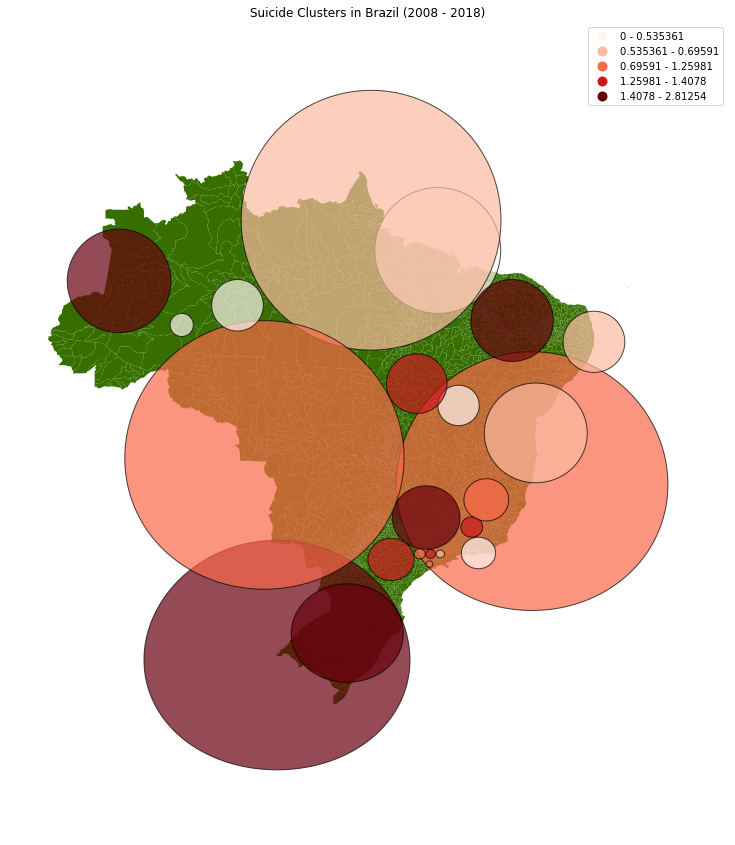

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
gd.plot(ax=ax, color="#366f00")
scheme = mapclassify.Quantiles(gdf["REL_RISK"], k=5)
geoplot.choropleth(
    gdf, hue=gdf["REL_RISK"], scheme=scheme,
    cmap='Reds', ax=ax, legend=True, alpha=0.7
)
plt.title("Suicide Clusters in Brazil (2008 - 2018)")
plt.savefig('Images/suicide_clusters.png')

Let's highlight the municipalities inside the clusters.

Read GIS file:

In [7]:
gis = gpd.read_file('Clusters/result.gis.shp')

Filter GIS to remove clusters with p-value < 0.05:

In [8]:
gis = gis[gis['P_VALUE'] < 0.05]

In [9]:
gis.head()

,LOC_ID,CLUSTER,P_VALUE,CLU_OBS,CLU_EXP,CLU_ODE,CLU_RR,CLU_POP,LOC_OBS,LOC_EXP,LOC_ODE,LOC_RR,LOC_POP,LOC_LAT,LOC_LONG,GINI_CLUST,geometry
0,430187,1.0,1.000000e-17,21569.0,11506.738245,1.874467,2.072061,19563340.73,2.0,2.407515,0.830732,0.830729,4093.17,-30.20,-57.55,F,POINT (-57.55000 -30.20000)
1,432240,1.0,1.000000e-17,21569.0,11506.738245,1.874467,2.072061,19563340.73,87.0,75.155021,1.157607,1.157725,127775.85,-29.75,-57.08,F,POINT (-57.08000 -29.75000)
2,431530,1.0,1.000000e-17,21569.0,11506.738245,1.874467,2.072061,19563340.73,25.0,13.656414,1.830642,1.830819,23218.14,-30.38,-56.45,F,POINT (-56.45000 -30.38000)
3,431060,1.0,1.000000e-17,21569.0,11506.738245,1.874467,2.072061,19563340.73,34.0,22.499238,1.511162,1.511311,38252.39,-29.12,-56.55,F,POINT (-56.55000 -29.12000)
4,430040,1.0,1.000000e-17,21569.0,11506.738245,1.874467,2.072061,19563340.73,77.0,45.809012,1.680892,1.681340,77882.83,-29.78,-55.79,F,POINT (-55.79000 -29.78000)


In [10]:
gis[gis['CLU_RR'] > 1.].shape, gis[gis['CLU_RR'] < 1.].shape

((3717, 17), (3626, 17))

In [11]:
def remove_last_digit(x):
    return np.floor(x.astype(int) / 10).astype(int)

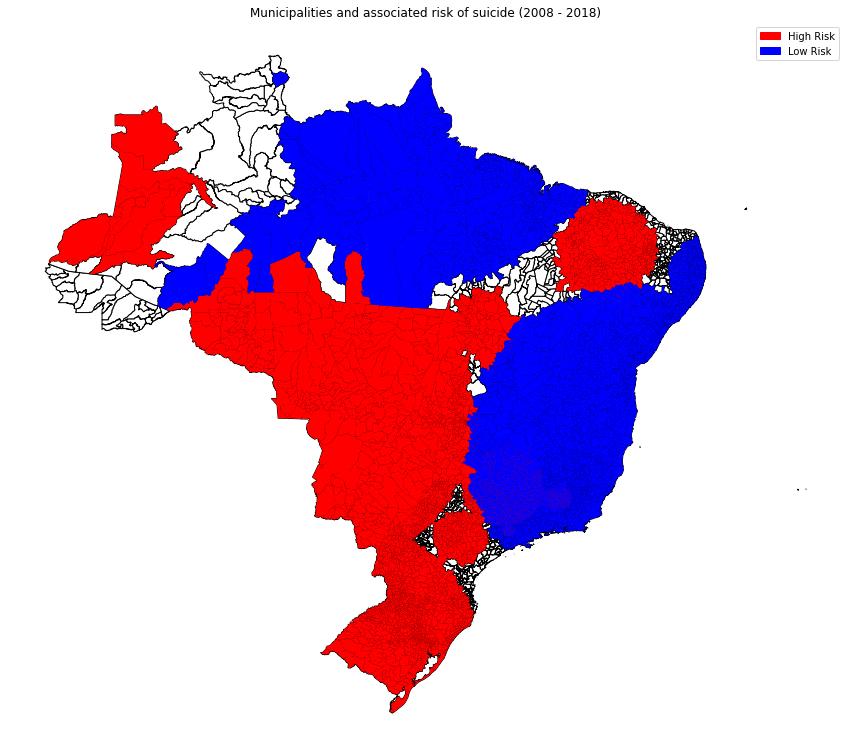

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
gd.plot(ax=ax, color="white", edgecolor='black')

mun_risk_ids = gis[gis['CLU_RR'] > 1.0]['LOC_ID'].astype(int).tolist()
gd_risk = gd[remove_last_digit(gd['CD_GEOCMU']).apply(lambda x: x in mun_risk_ids)]
plot_risk = gd_risk.plot(ax=ax, color="red")

mun_moderate_ids = gis[gis['CLU_RR'] < 1.0]['LOC_ID'].astype(int).tolist()
gd_moderate = gd[remove_last_digit(gd['CD_GEOCMU']).apply(lambda x: x in mun_moderate_ids)]
plot_moderate = gd_moderate.plot(ax=ax, color="blue")

red_patch = mpatches.Patch(color='red', label='High Risk')
blue_patch = mpatches.Patch(color='blue', label='Low Risk')
plt.legend(handles=[red_patch, blue_patch])
plt.axis('off')
plt.title("Municipalities and associated risk of suicide (2008 - 2018)")
plt.savefig('Images/municipalities_high_low_risk.png')

Same thing, but only high risk clusters

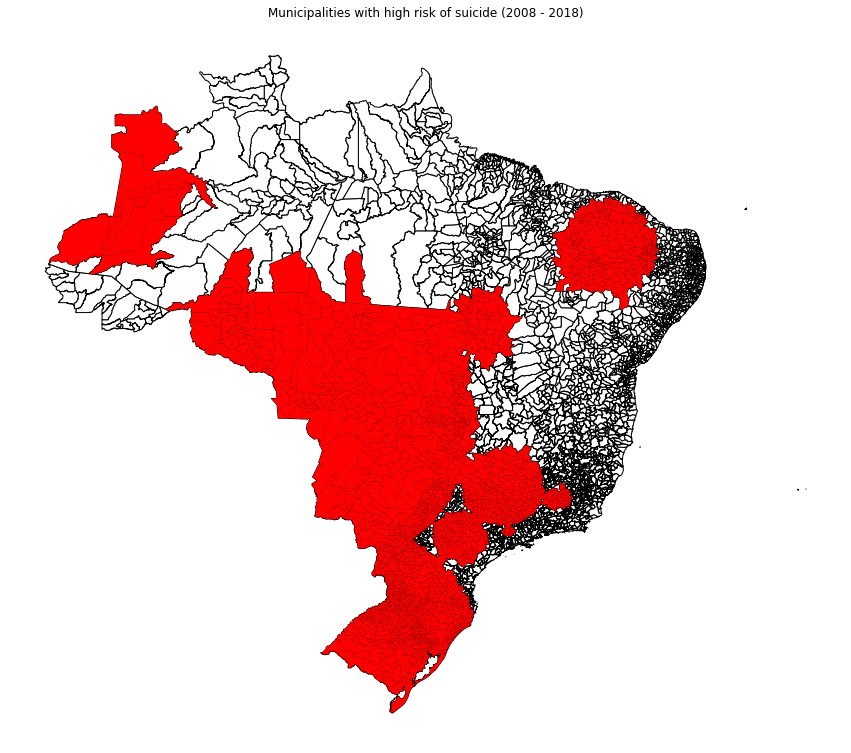

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
gd.plot(ax=ax, color="white", edgecolor='black')

mun_risk_ids = gis[gis['CLU_RR'] > 1.0]['LOC_ID'].astype(int).tolist()
gd_risk = gd[remove_last_digit(gd['CD_GEOCMU']).apply(lambda x: x in mun_risk_ids)]
plot_risk = gd_risk.plot(ax=ax, color="red")

plt.axis('off')
plt.title("Municipalities with high risk of suicide (2008 - 2018)")
plt.savefig('Images/municipalities_high_risk.png')

# Dataframe for classification analysis

Creating a dataframe where for each city we define a variable RISK:

- RISK = 1 - this city belongs to a high risk cluster
- RISK = 0 - this city does not belong to a high risk cluster

In [26]:
import pandas as pd
muncod_risk = pd.read_csv(root + "CSV/Cadmun/CADMUN.csv", skiprows=[1])
muncod_risk["RISK"] = [1 if x in mun_risk_ids else 0 for x in muncod_risk["MUNCOD"]]
muncod_risk = muncod_risk[["MUNCOD","RISK"]]
muncod_risk.to_csv(root + 'CSV/SatScan/muncod_risk.csv')